## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1327, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 1327 (delta 318), reused 318 (delta 283), pack-reused 904
Receiving objects: 100% (1327/1327), 12.82 MiB | 31.78 MiB/s, done.
Resolving deltas: 100% (900/900), done.


We will execute all the code within the cloned project directory, that is `fastercnn-pytorch-training-pipeline`.

In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/kaggle/working/fastercnn-pytorch-training-pipeline


In [3]:
%%writefile requirements.txt
# Base-------------------------------------
albumentations>=1.1.0
ipython
jupyter
matplotlib
opencv-python>=4.1.1.26
opencv-python-headless>=4.1.1.26
Pillow
PyYAML
scikit-image
scikit-learn
scipy
# torch==2.0.0
# torchvision==0.15.1
numpy
protobuf<=3.20.1
pandas
tqdm

# Logging----------------------------------
wandb
tensorboard

# Model summary----------------------------
torchinfo

# Extras-----------------------------------
pycocotools>=2.0.2
setuptools==59.5.0
torchmetrics # Evaluation

# Transformer based models.
vision_transformers

# Export-----------------------------------
# onnxruntime
# onnx
# onnxruntime-gpu

Overwriting requirements.txt


In [4]:
import torch
torch.__version__
torch.cuda.is_available()

True

In [5]:
# Install the Requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
  Obtaining dependency information for pycocotools>=2.0.2 from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 51.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 28.4 MB/s eta 0:00:00
  Created wheel for vision_transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48414 sha256=708ba23d628cc7de510af25e259cf94ad69adae695256c22efd9409e15eaa728
  Stored in directory: /root/.cache/pip/wheels/02/f4/94/0a5c8d2a4fcb6aa4c590906ffd3d52dc8edbe94262ecaa7dae
Successfully built vision_transformers
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.1.2
    Uninstalling setuptools-68.1.2:
      Succes

## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [6]:
!curl -L "https://universe.roboflow.com/ds/fFzJtWzLJu?key=cRh3oQS4mQ" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   900  100   900    0     0   3604      0 --:--:-- --:--:-- --:--:--  3614
100 77.4M  100 77.4M    0     0  24.4M      0  0:00:03  0:00:03 --:--:-- 29.4M
Archive:  roboflow.zip
 extracting: custom_data/README.dataset.txt  
 extracting: custom_data/README.roboflow.txt  
   creating: custom_data/test/
 extracting: custom_data/test/Fire-100-_jpg.rf.527164e829a69e304b9937162f3450ad.jpg  
 extracting: custom_data/test/Fire-100-_jpg.rf.527164e829a69e304b9937162f3450ad.xml  
 extracting: custom_data/test/Fire-1006-_jpg.rf.287dbfdacfffd371b342e7c63e812b5b.jpg  
 extracting: custom_data/test/Fire-1006-_jpg.rf.287dbfdacfffd371b342e7c63e812b5b.xml  
 extracting: custom_data/test/Fire-1011-_jpg.rf.24724d6be903c8152877f96cf9f8a46b.jpg  
 extracting: custom_data/test/Fire-1011-_jpg.rf.24724d6be903c8152877f96cf9f8a46b.xml  
 extracting: cust

## Create the Custom Dataset YAML File

The YAML file should contain:
* `TRAIN_DIR_IMAGES`: Path to the training images directory.
* `TRAIN_DIR_LABELS`: Path to the training labels directory containing the XML files. Can be the same as `TRAIN_DIR_IMAGES`.
* `VALID_DIR_IMAGES`: Path to the validation images directory.
* `VALID_DIR_LABELS`: Path to the validation labels directory containing the XML files. Can be the same as `VALID_DIR_IMAGES`.
* `CLASSES`: All the class names in the dataset along with the `__background__` class as the first class.
* `NC`: The number of classes. This should be the number of classes in the dataset + the background class. If the number of classes in the dataset are 7, then `NC` should be 8.
* `SAVE_VALID_PREDICTION_IMAGES`: Whether to save the prediction results from the validation loop or not.

In [7]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'
TEST_DIR_IMAGES: 'custom_data/test'
TEST_DIR_LABELS: 'custom_data/test'

# Class names.
CLASSES: [
    '__background__',
    'Fire', 'Smoke'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 3

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

For this training example we use:
* The official Faster RCNN ResNet50 FPN model.
* Batch size of 8. You may change it according to the GPU memory available.

In [8]:
!wandb disabled

W&B disabled.


In [9]:
!python train.py --data data_configs/custom_data.yaml --epochs 100 --model fasterrcnn_mobilenetv3_large_fpn --name custom_training --batch 8

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Not using distributed mode
device cuda
Checking Labels and images...
100%|████████████████████████████████████| 1194/1194 [00:00<00:00, 57349.63it/s]
Checking Labels and images...
100%|█████████████████████████████████████| 340/340 [00:00<00:00, 124907.01it/s]
Creating data loaders
Number of training samples: 1194
Number of validation samples: 340

Building model from scratch...
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████████████████████████████████| 74.2M/74.2M [00:00<00:00, 85.9MB/s]
Layer (type (var_name))                                           Input Shape               Output Shape

## Visualize Validation Results

Check out a few validation results from `outputs/training/custom_training` directory.

In [10]:
import matplotlib.pyplot as plt
import glob as glob

['outputs/training/custom_training/image_5_1.jpg', 'outputs/training/custom_training/image_0_1.jpg', 'outputs/training/custom_training/image_2_1.jpg', 'outputs/training/custom_training/image_4_1.jpg', 'outputs/training/custom_training/image_3_1.jpg', 'outputs/training/custom_training/image_7_1.jpg', 'outputs/training/custom_training/image_6_1.jpg', 'outputs/training/custom_training/image_1_1.jpg']


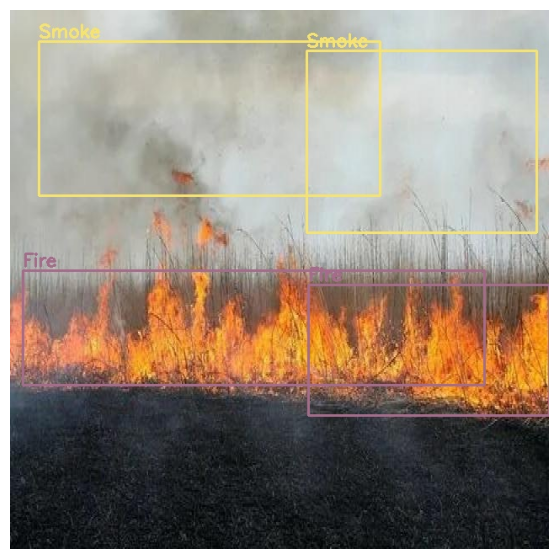

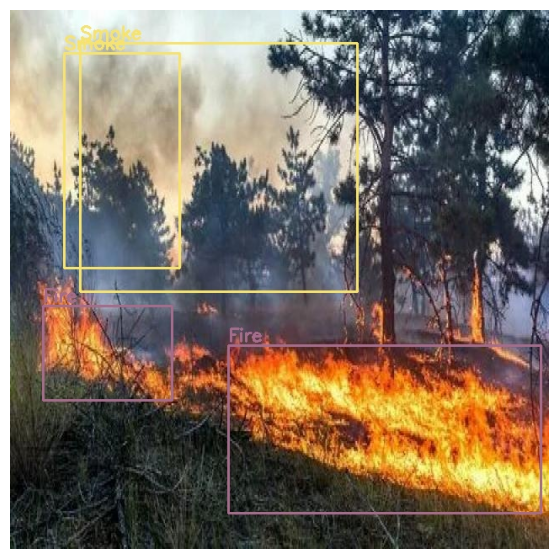

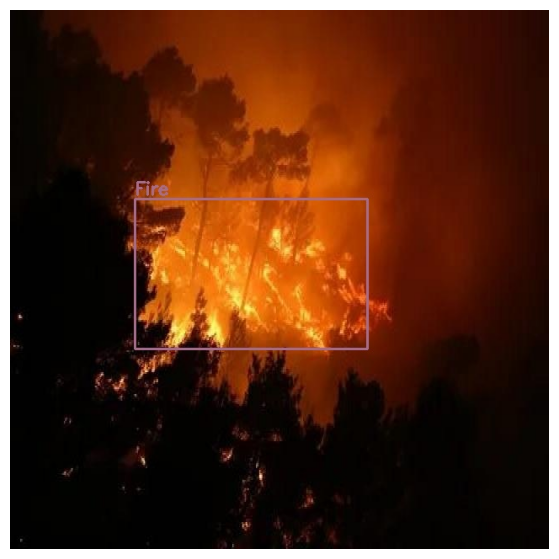

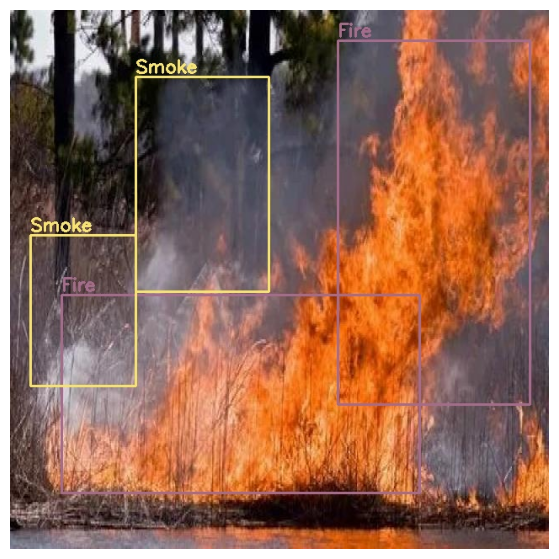

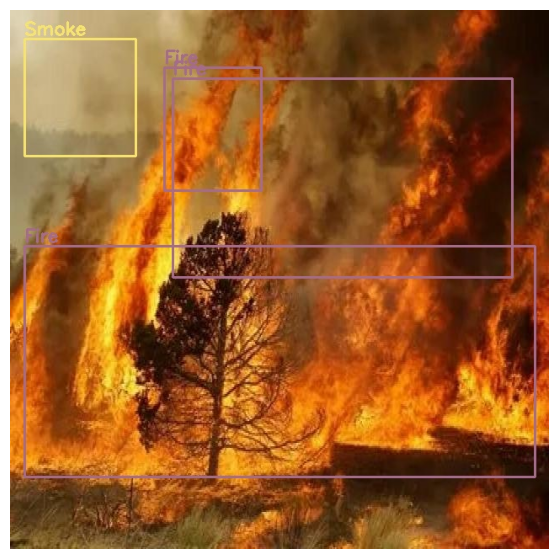

In [11]:
results_dir_path = 'outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")
print(valid_images)
for i in range(5):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Check Out the Repo for Latest Updates

https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [12]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_mobilenetv3_large_fpn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Checking Labels and images...
100%|███████████████████████████████████████████| 22/22 [00:05<00:00,  4.20it/s]


{'classes': tensor([1, 2], dtype=torch.int32),
 'map': tensor(0.1145),
 'map_50': tensor(0.3669),
 'map_75': tensor(0.0277),
 'map_large': tensor(0.1315),
 'map_medium': tensor(0.0713),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.0437),
 'mar_1': tensor(0.0941),
 'mar_10': tensor(0.2599),
 'mar_100': tensor(0.3109),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.3373),
 'mar_medium': tensor(0.2375),
 'mar_small': tensor(0.2200)}


In [13]:
# Verbose mAP.
!python eval.py  --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_mobilenetv3_large_fpn --verbose

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Checking Labels and images...
100%|███████████████████████████████████████████| 22/22 [00:05<00:00,  4.23it/s]


{'classes': tensor([1, 2], dtype=torch.int32),
 'map': tensor(0.1145),
 'map_50': tensor(0.3669),
 'map_75': tensor(0.0277),
 'map_large': tensor(0.1315),
 'map_medium': tensor(0.0713),
 'map_per_class': tensor([0.1339, 0.0952]),
 'map_small': tensor(0.0437),
 'mar_1': tensor(0.0941),
 'mar_10': tensor(0.2599),
 'mar_100': tensor(0.3109),
 'mar_100_per_class': tensor([0.3090, 0.3128]),
 'mar_large': tensor(0.3373),
 'mar_medium': tensor(0.2375),
 'mar_small': tensor(0.2200)}


"Classes: ['__background__', 'Fire', 'Smoke']"


AP / AR per class
-------------------------------------------------------------------------
|    | Class  